# Data Loading

## Import Library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

## Mengambil Dataset dari Kaggle

In [2]:
#install kaggle
!pip install -q kaggle
from google.colab import files
files.upload() #upload file kaggle.json

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"galaxydnjv","key":"eba1949c78957118036212631ecbdc0b"}'}

In [3]:
!rm -r ~/.kaggle
!mkdir ~/.kaggle
!mv ./kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

rm: cannot remove '/root/.kaggle': No such file or directory


**Unduh dataset**

In [4]:
#mengunduh dataset dari kaggle
!kaggle datasets download -d zygmunt/goodbooks-10k

 86% 10.0M/11.6M [00:01<00:00, 9.75MB/s]
100% 11.6M/11.6M [00:01<00:00, 8.79MB/s]


In [5]:
#mengekstrak file zip dari kaggle
!unzip /content/goodbooks-10k.zip

Archive:  /content/goodbooks-10k.zip
  inflating: book_tags.csv           
  inflating: books.csv               
  inflating: ratings.csv             
  inflating: sample_book.xml         
  inflating: tags.csv                
  inflating: to_read.csv             


# Data Understanding
Load data menggunakan pandas

In [6]:
buku = pd.read_csv('/content/books.csv')
genre = pd.read_csv('/content/book_tags.csv')
jenis_genre = pd.read_csv('/content/tags.csv')
user = pd.read_csv('/content/to_read.csv')
rating = pd.read_csv('/content/ratings.csv')

**Dataset books**

In [7]:
buku.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         10000 non-null  int64  
 1   book_id                    10000 non-null  int64  
 2   best_book_id               10000 non-null  int64  
 3   work_id                    10000 non-null  int64  
 4   books_count                10000 non-null  int64  
 5   isbn                       9300 non-null   object 
 6   isbn13                     9415 non-null   float64
 7   authors                    10000 non-null  object 
 8   original_publication_year  9979 non-null   float64
 9   original_title             9415 non-null   object 
 10  title                      10000 non-null  object 
 11  language_code              8916 non-null   object 
 12  average_rating             10000 non-null  float64
 13  ratings_count              10000 non-null  int6

In [8]:
buku.head(3)

,id,book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,...,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url
0,1,2767052,2767052,2792775,272,439023483,9.780439e+12,Suzanne Collins,2008.0,The Hunger Games,...,4780653,4942365,155254,66715,127936,560092,1481305,2706317,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...
1,2,3,3,4640799,491,439554934,9.780440e+12,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Philosopher's Stone,...,4602479,4800065,75867,75504,101676,455024,1156318,3011543,https://images.gr-assets.com/books/1474154022m...,https://images.gr-assets.com/books/1474154022s...
2,3,41865,41865,3212258,226,316015849,9.780316e+12,Stephenie Meyer,2005.0,Twilight,...,3866839,3916824,95009,456191,436802,793319,875073,1355439,https://images.gr-assets.com/books/1361039443m...,https://images.gr-assets.com/books/1361039443s...


In [9]:
buku.shape

(10000, 23)

In [10]:
print('Jumlah buku: ', len(buku.book_id.unique()))
print('Jumlah author: ', len(buku.authors.unique()))

Jumlah buku:  10000
Jumlah author:  4664


**Dataset genre**

In [11]:
genre.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999912 entries, 0 to 999911
Data columns (total 3 columns):
 #   Column             Non-Null Count   Dtype
---  ------             --------------   -----
 0   goodreads_book_id  999912 non-null  int64
 1   tag_id             999912 non-null  int64
 2   count              999912 non-null  int64
dtypes: int64(3)
memory usage: 22.9 MB


In [12]:
genre.head(3)

,goodreads_book_id,tag_id,count
0,1,30574,167697
1,1,11305,37174
2,1,11557,34173


In [13]:
genre.shape

(999912, 3)

In [14]:
print('Jumlah genre buku: ', len(genre.tag_id.unique()))

Jumlah genre buku:  34252


**Dataset jenis_genre**

In [15]:
jenis_genre.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34252 entries, 0 to 34251
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   tag_id    34252 non-null  int64 
 1   tag_name  34252 non-null  object
dtypes: int64(1), object(1)
memory usage: 535.3+ KB


In [16]:
jenis_genre.head(3)

,tag_id,tag_name
0,0,-
1,1,--1-
2,2,--10-


In [17]:
jenis_genre.shape

(34252, 2)

In [18]:
print('Jumlah jenis genre buku: ', len(jenis_genre.tag_name.unique()))

Jumlah jenis genre buku:  34252


**Dataset ratings**

In [19]:
rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 981756 entries, 0 to 981755
Data columns (total 3 columns):
 #   Column   Non-Null Count   Dtype
---  ------   --------------   -----
 0   book_id  981756 non-null  int64
 1   user_id  981756 non-null  int64
 2   rating   981756 non-null  int64
dtypes: int64(3)
memory usage: 22.5 MB


In [20]:
rating.head(3)

,book_id,user_id,rating
0,1,314,5
1,1,439,3
2,1,588,5


In [21]:
rating.shape

(981756, 3)

In [22]:
rate = rating.groupby('rating').count()
rate

,book_id,user_id
rating,,
1,19575,19575
2,63231,63231
3,248623,248623
4,357366,357366
5,292961,292961


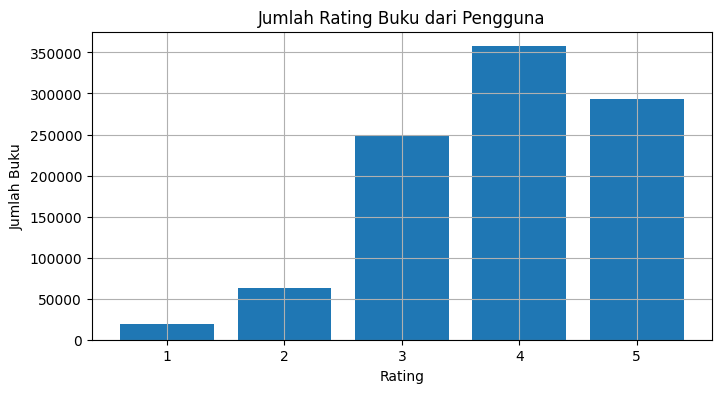

In [23]:
plt.figure(figsize=(8,4))
plt.title('Jumlah Rating Buku dari Pengguna')
plt.xlabel('Rating')
plt.ylabel('Jumlah Buku')
plt.bar(rate.index, rate['book_id'])
plt.grid(True)
plt.show()

**Dataset users**

In [24]:
user.head(3)

,user_id,book_id
0,1,112
1,1,235
2,1,533


In [25]:
user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 912705 entries, 0 to 912704
Data columns (total 2 columns):
 #   Column   Non-Null Count   Dtype
---  ------   --------------   -----
 0   user_id  912705 non-null  int64
 1   book_id  912705 non-null  int64
dtypes: int64(2)
memory usage: 13.9 MB


In [26]:
user.describe()

,user_id,book_id
count,912705.000000,912705.000000
mean,27668.980115,2454.739538
std,14775.096388,2626.359921
min,1.000000,1.000000
25%,15507.000000,360.000000
50%,27799.000000,1381.000000
75%,40220.000000,3843.000000
max,53424.000000,10000.000000


In [27]:
print('Jumlah user: ', len(user.user_id.unique()))

Jumlah user:  48871


# Data Preprocessing

**Menggabungkan tagID pada Buku**

In [28]:
tags = np.concatenate((
    genre.tag_id.unique(),
    jenis_genre.tag_id.unique()
))

#mengurutkan data dan menghapus data yang sama
tags = np.sort(np.unique(tags))

print('Jumlah genre berdasarkan tag_id: ', len(tags))

Jumlah genre berdasarkan tag_id:  34252


**Mencari Jumlah Rating**

In [29]:
books = pd.merge(rating, buku, on='book_id', how='left')
books

,book_id,user_id,rating,id,best_book_id,work_id,books_count,isbn,isbn13,authors,...,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url
0,1,314,5,27.0,1.0,41335427.0,275.0,439785960,9.780440e+12,"J.K. Rowling, Mary GrandPré",...,1678823.0,1785676.0,27520.0,7308.0,21516.0,136333.0,459028.0,1161491.0,https://images.gr-assets.com/books/1361039191m...,https://images.gr-assets.com/books/1361039191s...
1,1,439,3,27.0,1.0,41335427.0,275.0,439785960,9.780440e+12,"J.K. Rowling, Mary GrandPré",...,1678823.0,1785676.0,27520.0,7308.0,21516.0,136333.0,459028.0,1161491.0,https://images.gr-assets.com/books/1361039191m...,https://images.gr-assets.com/books/1361039191s...
2,1,588,5,27.0,1.0,41335427.0,275.0,439785960,9.780440e+12,"J.K. Rowling, Mary GrandPré",...,1678823.0,1785676.0,27520.0,7308.0,21516.0,136333.0,459028.0,1161491.0,https://images.gr-assets.com/books/1361039191m...,https://images.gr-assets.com/books/1361039191s...
3,1,1169,4,27.0,1.0,41335427.0,275.0,439785960,9.780440e+12,"J.K. Rowling, Mary GrandPré",...,1678823.0,1785676.0,27520.0,7308.0,21516.0,136333.0,459028.0,1161491.0,https://images.gr-assets.com/books/1361039191m...,https://images.gr-assets.com/books/1361039191s...
4,1,1185,4,27.0,1.0,41335427.0,275.0,439785960,9.780440e+12,"J.K. Rowling, Mary GrandPré",...,1678823.0,1785676.0,27520.0,7308.0,21516.0,136333.0,459028.0,1161491.0,https://images.gr-assets.com/books/1361039191m...,https://images.gr-assets.com/books/1361039191s...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
981751,10000,48386,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
981752,10000,49007,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
981753,10000,49383,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
981754,10000,50124,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Memeriksa Missing Value**

In [30]:
books.isnull().sum()

book_id                           0
user_id                           0
rating                            0
id                           902055
best_book_id                 902055
work_id                      902055
books_count                  902055
isbn                         902934
isbn13                       902453
authors                      902055
original_publication_year    902155
original_title               903836
title                        902055
language_code                913194
average_rating               902055
ratings_count                902055
work_ratings_count           902055
work_text_reviews_count      902055
ratings_1                    902055
ratings_2                    902055
ratings_3                    902055
ratings_4                    902055
ratings_5                    902055
image_url                    902055
small_image_url              902055
dtype: int64

In [31]:
books.groupby('book_id').sum()

,user_id,rating,id,best_book_id,work_id,books_count,isbn13,original_publication_year,average_rating,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5
book_id,,,,,,,,,,,,,,,,,
1,2590897,424,2700.0,100.0,4.133543e+09,27500.0,9.780440e+14,200500.0,454.00,167882300.0,178567600.0,2752000.0,730800.0,2151600.0,13633300.0,45902800.0,116149100.0
2,2534124,421,2100.0,200.0,2.809203e+08,30700.0,9.780439e+14,200300.0,446.00,173536800.0,184054800.0,2868500.0,952800.0,3157700.0,18021000.0,49442700.0,112480600.0
3,2463015,309,200.0,300.0,4.640799e+08,49100.0,9.780440e+14,199700.0,444.00,460247900.0,480006500.0,7586700.0,7550400.0,10167600.0,45502400.0,115631800.0,301154300.0
4,2564438,446,0.0,0.0,0.000000e+00,0.0,0.000000e+00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,2399797,389,1800.0,500.0,2.402163e+08,37600.0,9.780440e+14,199900.0,453.00,183282300.0,196937500.0,3609900.0,671600.0,2041300.0,16612900.0,50944700.0,126667000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9996,2897301,389,0.0,0.0,0.000000e+00,0.0,0.000000e+00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9997,2224005,394,0.0,0.0,0.000000e+00,0.0,0.000000e+00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9998,2321270,411,770830.0,949810.0,5.541920e+06,8550.0,9.291646e+14,186390.0,371.45,1089365.0,1319170.0,97470.0,25080.0,79610.0,289370.0,524685.0,400425.0


**Menggabungkan Data dengan Judul, Penulis, dan Tahun Terbit Buku**

In [32]:
rate = rating
rate

,book_id,user_id,rating
0,1,314,5
1,1,439,3
2,1,588,5
3,1,1169,4
4,1,1185,4
...,...,...,...
981751,10000,48386,5
981752,10000,49007,4
981753,10000,49383,5
981754,10000,50124,5


In [33]:
df = pd.merge(rating, books[['book_id', 'authors', 'title', 'original_publication_year']], on='book_id', how='left')
df

,book_id,user_id,rating,authors,title,original_publication_year
0,1,314,5,"J.K. Rowling, Mary GrandPré",Harry Potter and the Half-Blood Prince (Harry ...,2005.0
1,1,314,5,"J.K. Rowling, Mary GrandPré",Harry Potter and the Half-Blood Prince (Harry ...,2005.0
2,1,314,5,"J.K. Rowling, Mary GrandPré",Harry Potter and the Half-Blood Prince (Harry ...,2005.0
3,1,314,5,"J.K. Rowling, Mary GrandPré",Harry Potter and the Half-Blood Prince (Harry ...,2005.0
4,1,314,5,"J.K. Rowling, Mary GrandPré",Harry Potter and the Half-Blood Prince (Harry ...,2005.0
...,...,...,...,...,...,...
96708227,10000,51328,1,NaN,NaN,NaN
96708228,10000,51328,1,NaN,NaN,NaN
96708229,10000,51328,1,NaN,NaN,NaN
96708230,10000,51328,1,NaN,NaN,NaN


# Content Based Filtering

## Data Preparation

**Mengatasi Missing Value**

In [34]:
df.isnull().sum()

book_id                             0
user_id                             0
rating                              0
authors                      88860317
title                        88860317
original_publication_year    88870317
dtype: int64

Terdapat nilai kosong pada kolom `authors`, `title`, dan `original_publication_year`.

In [35]:
#menghapus data yang bernilai kosong
df = df.dropna()

In [36]:
df

,book_id,user_id,rating,authors,title,original_publication_year
0,1,314,5,"J.K. Rowling, Mary GrandPré",Harry Potter and the Half-Blood Prince (Harry ...,2005.0
1,1,314,5,"J.K. Rowling, Mary GrandPré",Harry Potter and the Half-Blood Prince (Harry ...,2005.0
2,1,314,5,"J.K. Rowling, Mary GrandPré",Harry Potter and the Half-Blood Prince (Harry ...,2005.0
3,1,314,5,"J.K. Rowling, Mary GrandPré",Harry Potter and the Half-Blood Prince (Harry ...,2005.0
4,1,314,5,"J.K. Rowling, Mary GrandPré",Harry Potter and the Half-Blood Prince (Harry ...,2005.0
...,...,...,...,...,...,...
96689210,9998,53249,5,"Kōbō Abe, E. Dale Saunders",The Woman in the Dunes,1962.0
96689211,9998,53249,5,"Kōbō Abe, E. Dale Saunders",The Woman in the Dunes,1962.0
96689212,9998,53249,5,"Kōbō Abe, E. Dale Saunders",The Woman in the Dunes,1962.0
96689213,9998,53249,5,"Kōbō Abe, E. Dale Saunders",The Woman in the Dunes,1962.0


In [37]:
#missing value setelah menghapus data yg kosong
df.isnull().sum()

book_id                      0
user_id                      0
rating                       0
authors                      0
title                        0
original_publication_year    0
dtype: int64

Setelah dilakukan penghapusan pada missing value, kini sudah tidak terdapat missing value pada data. Jumlah row yang awalnya 96.708.232 berkurang menjadi 7.837.915

In [38]:
print('Jumlah judul buku: ', len(df.title.unique()))
print('Jumlah author: ', len(df.authors.unique()))
print('Jumlah tahun publikasi buku: ', len(df.original_publication_year.unique()))

Jumlah judul buku:  811
Jumlah author:  479
Jumlah tahun publikasi buku:  148


Menghapus data yang sama berdasarkan `book_id` supaya data lebih rapi

In [39]:
df = df.drop_duplicates('book_id')
df

,book_id,user_id,rating,authors,title,original_publication_year
0,1,314,5,"J.K. Rowling, Mary GrandPré",Harry Potter and the Half-Blood Prince (Harry ...,2005.0
10000,2,1169,3,"J.K. Rowling, Mary GrandPré",Harry Potter and the Order of the Phoenix (Har...,2003.0
20000,3,314,3,"J.K. Rowling, Mary GrandPré",Harry Potter and the Sorcerer's Stone (Harry P...,1997.0
40000,5,314,4,"J.K. Rowling, Mary GrandPré, Rufus Beck",Harry Potter and the Prisoner of Azkaban (Harr...,1999.0
50000,6,173,5,"J.K. Rowling, Mary GrandPré",Harry Potter and the Goblet of Fire (Harry Pot...,2000.0
...,...,...,...,...,...,...
95965534,9914,2175,4,Bret Easton Ellis,The Informers,1994.0
95974370,9915,2480,4,Bret Easton Ellis,Less Than Zero,1985.0
96214237,9943,7173,5,Francine Rivers,The Atonement Child,1997.0
96332652,9957,138,4,Ian McEwan,The Cement Garden,1978.0


In [40]:
#konversi 'book_id', 'title', 'authors', dan 'original_publication_year' menjadi bentuk list
book_id = df['book_id'].tolist()
book_ttl = df['title'].tolist()
book_auth = df['authors'].tolist()
book_publ = df['original_publication_year'].tolist()


In [41]:
#membuat dictionary dari data yg dikonversi diatas
df = pd.DataFrame({
    'IDBuku' : book_id,
    'judul_buku' : book_ttl,
    'penulis' : book_auth,
    'thn_terbit' : book_publ
})
df

,IDBuku,judul_buku,penulis,thn_terbit
0,1,Harry Potter and the Half-Blood Prince (Harry ...,"J.K. Rowling, Mary GrandPré",2005.0
1,2,Harry Potter and the Order of the Phoenix (Har...,"J.K. Rowling, Mary GrandPré",2003.0
2,3,Harry Potter and the Sorcerer's Stone (Harry P...,"J.K. Rowling, Mary GrandPré",1997.0
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,"J.K. Rowling, Mary GrandPré, Rufus Beck",1999.0
4,6,Harry Potter and the Goblet of Fire (Harry Pot...,"J.K. Rowling, Mary GrandPré",2000.0
...,...,...,...,...
806,9914,The Informers,Bret Easton Ellis,1994.0
807,9915,Less Than Zero,Bret Easton Ellis,1985.0
808,9943,The Atonement Child,Francine Rivers,1997.0
809,9957,The Cement Garden,Ian McEwan,1978.0


## Model Development

**TF-IDF Vectorizer**

In [42]:
from sklearn.feature_extraction.text import TfidfVectorizer

tf = TfidfVectorizer()
tf.fit(df['penulis'])
tf.get_feature_names_out()

array(['ab', 'abe', 'acevedo', ..., 'zoltan', 'åsne', 'üster'],
      dtype=object)

In [43]:
#fitting dan transformasi ke bentuk matrix
tf_matrix = tf.fit_transform(df['penulis'])
tf_matrix.shape

(811, 1020)

In [44]:
tf_matrix.todense()

matrix([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        ...,
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.51218615, 0.        , ..., 0.        , 0.        ,
         0.        ]])

In [45]:
#membuat dataframe untuk melihat tf-idf matrix, kolom=penulis, baris=judul buku
pd.DataFrame(
    tf_matrix.todense(),
    columns=tf.get_feature_names_out(),
    index=df.judul_buku
).sample(22, axis=1).sample(10, axis=0)

,walls,knox,martyrs,bushnell,coetzee,harmon,mccarthy,sandra,javerbaum,porras,...,garth,mauldon,loree,danticat,william,catherine,coward,colleen,shauna,henri
judul_buku,,,,,,,,,,,,,,,,,,,,,
"The Da Vinci Code (Robert Langdon, #2)",0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
The Secret Garden,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
"Surely You're Joking, Mr. Feynman!: Adventures of a Curious Character",0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
Jitterbug Perfume,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
The War of Art: Break Through the Blocks & Win Your Inner Creative Battles,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
"Hot Six (Stephanie Plum, #6)",0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
The Glass Castle,0.707107,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
The America's Test Kitchen Family Cookbook,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
La Dame aux Camélias,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.484896,0.0,0.0,0.0


**Cosine Similarity**

In [46]:
from sklearn.metrics.pairwise import cosine_similarity

#hitung cosine similarity pada matrix tf-idf
cos_sim = cosine_similarity(tf_matrix)
cos_sim

array([[1., 1., 1., ..., 0., 0., 0.],
       [1., 1., 1., ..., 0., 0., 0.],
       [1., 1., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [47]:
#membuat dataframe dari cos_sim dengan baris dan kolom berupa judul buku
cos_sim_df = pd.DataFrame(cos_sim, index=df['judul_buku'], columns=df['judul_buku'])
print('Shape:', cos_sim_df.shape)

# Melihat similarity matrix pada setiap judul buku
cos_sim_df.sample(5, axis=1).sample(10, axis=0)


Shape: (811, 811)


judul_buku,The Metamorphosis and Other Stories,A Virtuous Woman,Deception Point,"Blind Willow, Sleeping Woman","Witches Abroad (Discworld, #12; Witches #3)"
judul_buku,,,,,
The Iliad/The Odyssey,0.000000,0.0,0.0,0.0,0.0
To Have and Have Not,0.000000,0.0,0.0,0.0,0.0
"The Oresteia (Ορέστεια, #1-3)",0.000000,0.0,0.0,0.0,0.0
America (The Book): A Citizen's Guide to Democracy Inaction,0.112095,0.0,0.0,0.0,0.0
Animal Farm / 1984,0.000000,0.0,0.0,0.0,0.0
Bleachers,0.000000,0.0,0.0,0.0,0.0
A Widow for One Year,0.000000,0.0,0.0,0.0,0.0
"Diamonds Are Forever (James Bond, #4)",0.000000,0.0,0.0,0.0,0.0
The Crying of Lot 49,0.000000,0.0,0.0,0.0,0.0


## Mendapatkan Rekomendasi
Membuat fungsi `book_reccomendations()`

In [48]:
def book_recommendations(judul_buku, similarity_data=cos_sim_df, items=df[['judul_buku', 'penulis']], k=5):
    index = similarity_data.loc[:,judul_buku].to_numpy().argpartition(
        range(-1, -k, -1))

    # Mengambil data dengan similarity terbesar dari index yang ada
    closest = similarity_data.columns[index[-1:-(k+2):-1]]

    # Drop nama_resto agar nama resto yang dicari tidak muncul dalam daftar rekomendasi
    closest = closest.drop(judul_buku, errors='ignore')

    return pd.DataFrame(closest).merge(items).head(k)

In [49]:
#data buku yang dicari
df[df.judul_buku.eq('The Door Into Summer')]

,IDBuku,judul_buku,penulis,thn_terbit
39,348,The Door Into Summer,Robert A. Heinlein,1957.0


In [50]:
#hasil rekomendasi buku berdasarkan buku yang dicari
book_recommendations('The Door Into Summer')

,judul_buku,penulis
0,Time Enough for Love,Robert A. Heinlein
1,Stranger in a Strange Land,Robert A. Heinlein
2,Job: A Comedy of Justice,Robert A. Heinlein
3,Mrs. Frisby and the Rats of NIMH (Rats of NIMH...,Robert C. O'Brien
4,Shadow Divers,Robert Kurson


Hasil rekomendasi menunjukkan buku dengan nama penulis sama atau hampir sama karena sistem rekomendasi dibuat berdasarkan penulis.

# Collaborative Filtering

## Data Understanding

In [51]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from pathlib import Path
import matplotlib.pyplot as plt

In [52]:
dr = rating
dr

,book_id,user_id,rating
0,1,314,5
1,1,439,3
2,1,588,5
3,1,1169,4
4,1,1185,4
...,...,...,...
981751,10000,48386,5
981752,10000,49007,4
981753,10000,49383,5
981754,10000,50124,5


## Data Preparation

In [53]:
#mnegubah user_id menjadi list unique dan melakukan encoding
id_user = dr['user_id'].unique().tolist()
user_to_user_encoded = {x: i for i, x in enumerate(id_user)}
user_encoded_to_user = {i: x for i, x in enumerate(id_user)}

print(user_to_user_encoded)

{314: 0, 439: 1, 588: 2, 1169: 3, 1185: 4, 2077: 5, 2487: 6, 2900: 7, 3662: 8, 3922: 9, 5379: 10, 5461: 11, 5885: 12, 6630: 13, 7563: 14, 9246: 15, 10140: 16, 10146: 17, 10246: 18, 10335: 19, 10610: 20, 10944: 21, 11854: 22, 11927: 23, 12471: 24, 13282: 25, 13544: 26, 15494: 27, 16377: 28, 16913: 29, 17434: 30, 17663: 31, 17984: 32, 18031: 33, 18313: 34, 18361: 35, 20076: 36, 20467: 37, 20848: 38, 21228: 39, 21487: 40, 21713: 41, 22602: 42, 23576: 43, 23612: 44, 24326: 45, 24389: 46, 24499: 47, 24834: 48, 24845: 49, 25164: 50, 25182: 51, 25214: 52, 26145: 53, 26629: 54, 26661: 55, 28158: 56, 28767: 57, 29123: 58, 29703: 59, 30681: 60, 31001: 61, 32055: 62, 32305: 63, 32592: 64, 32635: 65, 32748: 66, 32923: 67, 33065: 68, 33697: 69, 33716: 70, 33872: 71, 33890: 72, 37284: 73, 37834: 74, 38080: 75, 38082: 76, 38475: 77, 39423: 78, 41074: 79, 42404: 80, 43985: 81, 44243: 82, 44397: 83, 45269: 84, 45493: 85, 46977: 86, 47476: 87, 47746: 88, 47800: 89, 48482: 90, 49298: 91, 50104: 92, 50342

In [54]:
#mengubah book_id menjadi list unique dan melakukan encoding
id_buku = dr['book_id'].unique().tolist()
buku_to_buku_encoded = {x: i for i, x in enumerate(id_buku)}
buku_encoded_to_buku = {i: x for i, x in enumerate(id_buku)}

In [55]:
# Mendapatkan jumlah readers
num_readers = len(user_to_user_encoded)
print(num_readers)

# Mendapatkan jumlah resto
num_books = len(buku_encoded_to_buku)
print(num_books)

# Mengubah rating menjadi nilai float
dr['rating'] = dr['rating'].values.astype(np.float32)

# Nilai minimum rating
min_rating = min(dr['rating'])

# Nilai maksimal rating
max_rating = max(dr['rating'])

print('Jumlah Pembaca: {}, Jumlah Buku: {}, Min Rating: {}, Max Rating: {}'.format(
    num_readers, num_books, min_rating, max_rating
))

53424
10000
Jumlah Pembaca: 53424, Jumlah Buku: 10000, Min Rating: 1.0, Max Rating: 5.0


**Membagi Data untuk Training dan Validasi**

In [56]:
# Mengacak dataset
dr = dr.sample(frac=1, random_state=42)
dr

,book_id,user_id,rating
646451,6495,19643,5.0
614851,6175,8563,4.0
974393,9920,52110,3.0
21471,215,33864,5.0
272540,2728,16587,3.0
...,...,...,...
259178,2594,26266,4.0
365838,3663,27212,5.0
131932,1320,31839,4.0
671155,6746,34952,2.0


In [57]:
# Membuat variabel x untuk mencocokkan data pembaca dan buku menjadi satu value
x = dr[['user_id', 'book_id']].values

# Membuat variabel y untuk membuat rating dari hasil
y = dr['rating'].apply(lambda x: (x - min_rating) / (max_rating - min_rating)).values

# Membagi menjadi 80% data train dan 20% data validasi
train_indices = int(0.8 * dr.shape[0])
x_train, x_val, y_train, y_val = (
    x[:train_indices],
    x[train_indices:],
    y[:train_indices],
    y[train_indices:]
)

print(x, y)

[[19643  6495]
 [ 8563  6175]
 [52110  9920]
 ...
 [31839  1320]
 [34952  6746]
 [32923  1220]] [1.   0.75 0.5  ... 0.75 0.25 0.5 ]


## Model Development

In [58]:
class RecommenderNet(tf.keras.Model):

  # Insialisasi fungsi
  def __init__(self, num_users, num_resto, embedding_size, **kwargs):
    super(RecommenderNet, self).__init__(**kwargs)
    self.num_readers = num_readers
    self.num_books = num_books
    self.embedding_size = embedding_size
    self.user_embedding = layers.Embedding( # layer embedding user
        num_readers,
        embedding_size,
        embeddings_initializer = 'he_normal',
        embeddings_regularizer = keras.regularizers.l2(1e-6)
    )
    self.user_bias = layers.Embedding(num_readers, 1) # layer embedding user bias
    self.book_embedding = layers.Embedding( # layer embeddings resto
        num_books,
        embedding_size,
        embeddings_initializer = 'he_normal',
        embeddings_regularizer = keras.regularizers.l2(1e-6)
    )
    self.book_bias = layers.Embedding(num_books, 1) # layer embedding resto bias

  def call(self, inputs):
    user_vector = self.user_embedding(inputs[:,0]) # memanggil layer embedding 1
    user_bias = self.user_bias(inputs[:, 0]) # memanggil layer embedding 2
    book_vector = self.book_embedding(inputs[:, 1]) # memanggil layer embedding 3
    book_bias = self.book_bias(inputs[:, 1]) # memanggil layer embedding 4

    dot_user_book = tf.tensordot(user_vector, book_vector, 2)

    x = dot_user_book + user_bias + book_bias

    return tf.nn.sigmoid(x) # activation sigmoid

# Training Model

In [59]:
model = RecommenderNet(num_readers, num_books, 50) # inisialisasi model

# model compile
model.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = keras.optimizers.Adam(learning_rate=0.001),
    metrics=[tf.keras.metrics.RootMeanSquaredError()]
)

In [60]:
history = model.fit(
    x = x_train,
    y = y_train,
    batch_size = 8,
    steps_per_epoch = 10000,
    epochs = 15,
    validation_data = (x_val, y_val)
)

Epoch 1/15
10000/10000 [==============================] - 97s 9ms/step - loss: 0.6755 - root_mean_squared_error: 0.3120 - val_loss: 0.6563 - val_root_mean_squared_error: 0.2944
Epoch 2/15
10000/10000 [==============================] - 89s 9ms/step - loss: 0.6318 - root_mean_squared_error: 0.2728 - val_loss: 0.6102 - val_root_mean_squared_error: 0.2524
Epoch 3/15
10000/10000 [==============================] - 89s 9ms/step - loss: 0.6031 - root_mean_squared_error: 0.2457 - val_loss: 0.5978 - val_root_mean_squared_error: 0.2410
Epoch 4/15
10000/10000 [==============================] - 89s 9ms/step - loss: 0.5958 - root_mean_squared_error: 0.2391 - val_loss: 0.5921 - val_root_mean_squared_error: 0.2362
Epoch 5/15
10000/10000 [==============================] - 88s 9ms/step - loss: 0.5895 - root_mean_squared_error: 0.2346 - val_loss: 0.5870 - val_root_mean_squared_error: 0.2320
Epoch 6/15
10000/10000 [==============================] - 90s 9ms/step - loss: 0.5851 - root_mean_squared_error: 0.

# Visualisasi Metrik

Mendapatkan Rekomendasi Collaborative Filtering

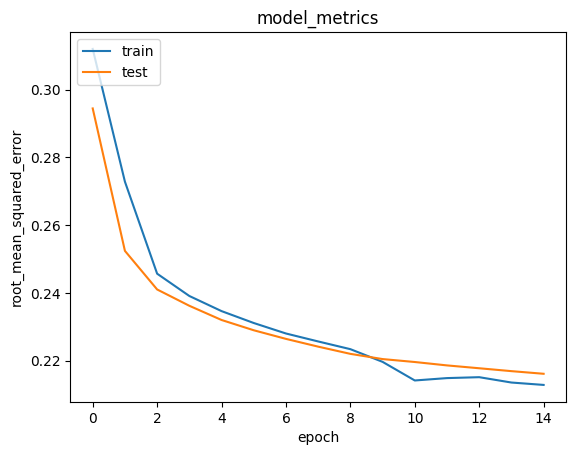

In [61]:
plt.plot(history.history['root_mean_squared_error'])
plt.plot(history.history['val_root_mean_squared_error'])
plt.title('model_metrics')
plt.ylabel('root_mean_squared_error')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Rekomendasi Menggunakan Collaborative Filtering

In [69]:
book_df = df
data = pd.read_csv('/content/ratings.csv')

# Mengambil sample user
id_pembaca = data.user_id.sample(1).iloc[0]
book_read_by_user = data[data.user_id == id_pembaca]

# Operator bitwise (~), bisa diketahui di sini https://docs.python.org/3/reference/expressions.html
book_not_read = book_df[~book_df['IDBuku'].isin(book_read_by_user.book_id.values)]['IDBuku']
book_not_read = list(
    set(book_not_read)
    .intersection(set(buku_to_buku_encoded.keys()))
)

book_not_read = [[buku_to_buku_encoded.get(x)] for x in book_not_read]
user_encoder = user_to_user_encoded.get(id_pembaca)
user_book_array = np.hstack(
    ([[user_encoder]] * len(book_not_read), book_not_read)
)

In [71]:
rate_buku = model.predict(user_book_array).flatten()

top_ratings_indices = rate_buku.argsort()[-10:][::-1]
recommended_book_ids = [
    buku_encoded_to_buku.get(book_not_read[x][0]) for x in top_ratings_indices
]

print('Menampilkan Rekomendasi Buku untuk User ID: {}'.format(id_pembaca))
print('===' * 12)
print('Rekomendasi Buku dengan Rating Tinggi dari Pembaca')
print('----' * 12)

top_book_user = (
    book_read_by_user.sort_values(
        by = 'rating',
        ascending=False
    )
    .head(5)
    .book_id.values
)

book_df_rows = book_df[book_df['IDBuku'].isin(top_book_user)]
for row in book_df_rows.itertuples():
    print(row.penulis, ':', row.judul_buku)

print('----' * 12)
print('Top 10 Rekomendasi Buku')
print('----' * 12)

recommended_book = book_df[book_df['IDBuku'].isin(recommended_book_ids)]
for row in recommended_book.itertuples():
    print(row.penulis, ':', row.judul_buku)

26/26 [==============================] - 0s 2ms/step
Menampilkan Rekomendasi Buku untuk User ID: 33207
Rekomendasi Buku dengan Rating Tinggi dari Pembaca
------------------------------------------------
Robert A. Heinlein : Time Enough for Love
------------------------------------------------
Top 10 Rekomendasi Buku
------------------------------------------------
Homer, Robert Fagles, E.V. Rieu, Frédéric Mugler, Bernard Knox : The Odyssey
Stephen Hawking, Leonard Mlodinow : A Briefer History of Time
John Grisham : The Innocent Man: Murder and Injustice in a Small Town
John Grisham : Bleachers
Steven Pinker : The Language Instinct: How the Mind Creates Language
Patricia Cornwell : Predator (Kay Scarpetta, #14)
Orson Scott Card : Speaker for the Dead (Ender's Saga, #2)
Tom Robbins : Half Asleep in Frog Pajamas
Tom Robbins : Another Roadside Attraction
D.H. Lawrence : Women in Love (Brangwen Family, #2)
